### T-Tests

#### 1. One-Sample t-Test
- **Definition**: Compares the sample mean to a known population mean.
- **Formula**: $ t = \frac{\bar{X} - \mu}{SE} $
- **Standard Error (SE)**: $ SE = \frac{s}{\sqrt{n}} $
- **Cohen's d**: $ d = \frac{\bar{X} - \mu}{s} $
- **Degrees of Freedom (df)**: $ df = n - 1 $
- **Example**: Testing if the average height of a group differs from a known national average.

#### 2. Two-Sample t-Test (Equal Variance)
- **Definition**: Compares the means of two independent groups assuming equal variances.
- **Formula**: $ t = \frac{\bar{X}_1 - \bar{X}_2}{SE} $
- **Standard Error (SE)**: $ SE = s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} $, where $ s_p = \sqrt{\frac{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}{n_1 + n_2 - 2}} $
- **Cohen's d**: $ d = \frac{\bar{X}_1 - \bar{X}_2}{s_p} $
- **Degrees of Freedom (df)**: $ df = n_1 + n_2 - 2 $
- **Example**: Comparing test scores between two classrooms.

#### 3. Two-Sample t-Test (Unequal Variance - Welch's)
- **Definition**: Compares the means of two independent groups without assuming equal variances.
- **Formula**: $ t = \frac{\bar{X}_1 - \bar{X}_2}{SE} $
- **Standard Error (SE)**: $ SE = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} $
- **Cohen's d**: $ d = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2 + s_2^2}{2}}} $ (pooled for unequal variances)
- **Degrees of Freedom (df)**: 
  $$df = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{\left(\frac{s_1^2}{n_1}\right)^2}{n_1 - 1} + \frac{\left(\frac{s_2^2}{n_2}\right)^2}{n_2 - 1}}
  $$
- **Example**: Comparing weights of two animal species.

#### 4. Paired t-Test
- **Definition**: Compares the means of paired observations.
- **Formula**: $ t = \frac{\bar{D}}{SE} $
- **Standard Error (SE)**: $ SE = \frac{s_D}{\sqrt{n}} $
- **Cohen's d**: $ d = \frac{\bar{D}}{s_D} $
- **Degrees of Freedom (df)**: $ df = n - 1 $
- **Example**: Measuring the effect of a drug by comparing before and after results for the same patients.

In [8]:
import numpy as np
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
import pandas as pd

np.random.seed(42)

sample_one_sample = np.random.normal(loc=50, scale=10, size=30)
pop_mean = 55
sample1_two_sample = np.random.normal(loc=50, scale=10, size=30)
sample2_two_sample = np.random.normal(loc=55, scale=12, size=30)
sample1_paired = np.random.normal(loc=50, scale=10, size=30)
sample2_paired = sample1_paired + np.random.normal(loc=5, scale=5, size=30)

def one_sample_t_test_manual(data, popmean):
    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    se = sample_std / np.sqrt(n)
    t_stat = (sample_mean - popmean) / se
    cohen_d = (sample_mean - popmean) / sample_std
    df = n - 1
    return t_stat, se, cohen_d, df

def two_sample_t_test_manual_equal_var(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    pooled_var = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    se = np.sqrt(pooled_var * (1 / n1 + 1 / n2))
    t_stat = (mean1 - mean2) / se
    cohen_d = (mean1 - mean2) / np.sqrt(pooled_var)
    df = n1 + n2 - 2
    return t_stat, se, cohen_d, df

def two_sample_t_test_manual_unequal_var(sample1, sample2):
    n1, n2 = len(sample1), len(sample2)
    mean1, mean2 = np.mean(sample1), np.mean(sample2)
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    se = np.sqrt(var1 / n1 + var2 / n2)
    t_stat = (mean1 - mean2) / se
    cohen_d = (mean1 - mean2) / np.sqrt((var1 + var2) / 2)
    df = ((var1 / n1 + var2 / n2)**2) / (((var1 / n1)**2 / (n1 - 1)) + ((var2 / n2)**2 / (n2 - 1)))
    return t_stat, se, cohen_d, df

def paired_t_test_manual(sample1, sample2):
    differences = sample1 - sample2
    n = len(differences)
    mean_diff = np.mean(differences)
    std_diff = np.std(differences, ddof=1)
    se = std_diff / np.sqrt(n)
    t_stat = mean_diff / se
    cohen_d = mean_diff / std_diff
    df = n - 1
    return t_stat, se, cohen_d, df

results = []

t_stat, se, cohen_d, df = one_sample_t_test_manual(sample_one_sample, pop_mean)
t_stat_scipy, p_value_scipy = ttest_1samp(sample_one_sample, pop_mean)
results.append(["One-Sample t-Test", len(sample_one_sample), df, cohen_d, se, t_stat, p_value_scipy, t_stat_scipy, p_value_scipy])

t_stat, se, cohen_d, df = two_sample_t_test_manual_equal_var(sample1_two_sample, sample2_two_sample)
t_stat_scipy, p_value_scipy = ttest_ind(sample1_two_sample, sample2_two_sample, equal_var=True)
results.append(["Two-Sample t-Test (Equal Variance)", len(sample1_two_sample) + len(sample2_two_sample), df, cohen_d, se, t_stat, p_value_scipy, t_stat_scipy, p_value_scipy])

t_stat, se, cohen_d, df = two_sample_t_test_manual_unequal_var(sample1_two_sample, sample2_two_sample)
t_stat_scipy, p_value_scipy = ttest_ind(sample1_two_sample, sample2_two_sample, equal_var=False)
results.append(["Two-Sample t-Test (Unequal Variance)", len(sample1_two_sample) + len(sample2_two_sample), df, cohen_d, se, t_stat, p_value_scipy, t_stat_scipy, p_value_scipy])

t_stat, se, cohen_d, df = paired_t_test_manual(sample1_paired, sample2_paired)
t_stat_scipy, p_value_scipy = ttest_rel(sample1_paired, sample2_paired)
results.append(["Paired t-Test", len(sample1_paired), df, cohen_d, se, t_stat, p_value_scipy, t_stat_scipy, p_value_scipy])

results_df = pd.DataFrame(results, columns=["Test", "N", "df", "Cohen's d", "SE", "Manual t-Statistic", "Manual p-Value", "Scipy t-Statistic", "Scipy p-Value"])
display(results_df)


,Test,N,df,Cohen's d,SE,Manual t-Statistic,Manual p-Value,Scipy t-Statistic,Scipy p-Value
0,One-Sample t-Test,30,29.000000,-0.764602,1.643179,-4.187899,0.000240,-4.187899,0.000240
1,Two-Sample t-Test (Equal Variance),60,58.000000,-0.595737,2.759200,-2.307278,0.024629,-2.307278,0.024629
2,Two-Sample t-Test (Unequal Variance),60,54.820381,-0.595737,2.759200,-2.307278,0.024842,-2.307278,0.024842
3,Paired t-Test,30,29.000000,-0.883692,0.934926,-4.840178,0.000040,-4.840178,0.000040


### One-Way ANOVA 

#### 1. Definition
One-Way ANOVA tests whether the means of three or more independent groups are significantly different.  
The Null Hypothesis is:  
$$ H_0: \mu_1 = \mu_2 = \cdots = \mu_k $$  
The Alternative Hypothesis is:  
$$ H_a: \text{At least one group mean is different} $$

#### 2. Formula for F-Statistic
$$ F = \frac{MS_{\text{between}}}{MS_{\text{within}}} $$  
Where:  
$$ MS_{\text{between}} = \frac{SS_{\text{between}}}{df_{\text{between}}}, \quad MS_{\text{within}} = \frac{SS_{\text{within}}}{df_{\text{within}}} $$

#### 3. Assumptions
- Normality: Data within each group are approximately normally distributed.  
- Equal Variance: Variances across groups are equal ($\sigma^2$ is constant).  
- Independence: Observations are independent within and between groups.  
- Random Assignment: Subjects are randomly assigned to groups to reduce bias.

#### 4. Components
Grand Mean:  
$$ \bar{\bar{Y}} = \frac{\sum_{i=1}^k \sum_{j=1}^{n_i} Y_{ij}}{N} $$  
Between-Groups Sum of Squares:  
$$ SS_{\text{between}} = \sum_{i=1}^k n_i (\bar{Y}_i - \bar{\bar{Y}})^2 $$  
Within-Groups Sum of Squares:  
$$ SS_{\text{within}} = \sum_{i=1}^k \sum_{j=1}^{n_i} (Y_{ij} - \bar{Y}_i)^2 $$  
Total Sum of Squares:  
$$ SS_{\text{total}} = SS_{\text{between}} + SS_{\text{within}} $$

#### 5. Degrees of Freedom
Between-Groups:  
$$ df_{\text{between}} = k - 1 $$  
Within-Groups:  
$$ df_{\text{within}} = N - k $$  
Total:  
$$ df_{\text{total}} = N - 1 $$

#### 6. Example
Suppose we are comparing the effectiveness of three different diets on weight loss.  
The Null Hypothesis is:  
$$ H_0: \mu_1 = \mu_2 = \mu_3 $$  
The Alternative Hypothesis is:  
$$ H_a: \text{At least one diet leads to a different mean weight loss} $$


,SS_Between,SS_Within,SS_Total,df_Between,df_Within,MS_Between,MS_Within,Manual_F,Scipy_F,Scipy_p_value
0,2165.964313,7716.880356,9882.844669,2,87,1082.982157,88.699774,12.209526,12.209526,0.000021


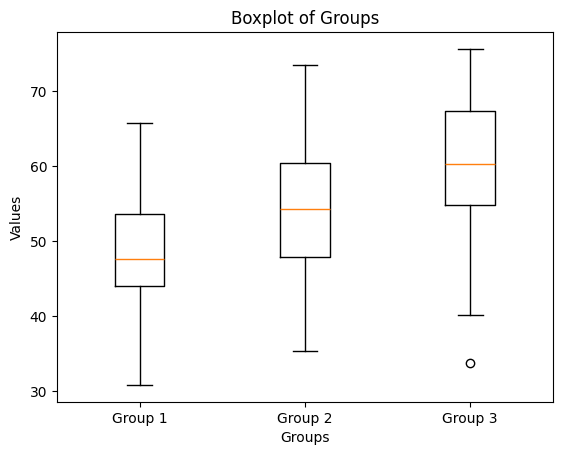


    ANOVA Results Summary:
    -----------------------
    - Between Groups:
        Degrees of Freedom: 2
        Sum of Squares: 2165.964
        Mean Square: 1082.982

    - Within Groups:
        Degrees of Freedom: 87
        Sum of Squares: 7716.880
        Mean Square: 88.700

    - F-Statistic: 12.210
    - p-Value: 0.00002
    


In [14]:
import numpy as np
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt

# Generate example data
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=10, size=30)
group2 = np.random.normal(loc=55, scale=10, size=30)
group3 = np.random.normal(loc=60, scale=10, size=30)
data = [group1, group2, group3]

# Manually calculate One-Way ANOVA

def one_way_anova(data):
    # Total observations and groups
    k = len(data)
    N = sum([len(group) for group in data])
    
    # Grand mean
    grand_mean = np.mean(np.concatenate(data))
    
    # Between-Groups Sum of Squares
    ss_between = sum([len(group) * (np.mean(group) - grand_mean)**2 for group in data])
    
    # Within-Groups Sum of Squares
    ss_within = sum([sum((group - np.mean(group))**2) for group in data])
    
    # Total Sum of Squares
    ss_total = ss_between + ss_within
    
    # Degrees of Freedom
    df_between = k - 1
    df_within = N - k
    df_total = N - 1
    
    # Mean Squares
    ms_between = ss_between / df_between
    ms_within = ss_within / df_within
    
    # F-Statistic
    f_stat = ms_between / ms_within
    
    return {
        "SS_Between": ss_between,
        "SS_Within": ss_within,
        "SS_Total": ss_total,
        "df_Between": df_between,
        "df_Within": df_within,
        "df_Total": df_total,
        "MS_Between": ms_between,
        "MS_Within": ms_within,
        "F_Statistic": f_stat
    }

# Calculate manually
manual_results = one_way_anova(data)

# Calculate using scipy
scipy_f_stat, scipy_p_value = f_oneway(*data)

# Combine results for comparison
results = {
    "SS_Between": manual_results["SS_Between"],
    "SS_Within": manual_results["SS_Within"],
    "SS_Total": manual_results["SS_Total"],
    "df_Between": manual_results["df_Between"],
    "df_Within": manual_results["df_Within"],
    "MS_Between": manual_results["MS_Between"],
    "MS_Within": manual_results["MS_Within"],
    "Manual_F": manual_results["F_Statistic"],
    "Scipy_F": scipy_f_stat,
    "Scipy_p_value": scipy_p_value
}

# Display results
results_df = pd.DataFrame([results])
display(results_df)

# Create a boxplot for the groups
plt.boxplot(data, tick_labels=["Group 1", "Group 2", "Group 3"])
plt.title("Boxplot of Groups")
plt.xlabel("Groups")
plt.ylabel("Values")
plt.show()

# Generate a textual summary for SciPy ANOVA results
def anova_summary(data):
    scipy_f_stat, scipy_p_value = f_oneway(*data)
    k = len(data)
    N = sum([len(group) for group in data])
    df_between = k - 1
    df_within = N - k

    summary = f"""
    ANOVA Results Summary:
    -----------------------
    - Between Groups:
        Degrees of Freedom: {df_between}
        Sum of Squares: {sum([len(group) * (np.mean(group) - np.mean(np.concatenate(data)))**2 for group in data]):.3f}
        Mean Square: {(sum([len(group) * (np.mean(group) - np.mean(np.concatenate(data)))**2 for group in data]) / df_between):.3f}

    - Within Groups:
        Degrees of Freedom: {df_within}
        Sum of Squares: {sum([sum((group - np.mean(group))**2) for group in data]):.3f}
        Mean Square: {(sum([sum((group - np.mean(group))**2) for group in data]) / df_within):.3f}

    - F-Statistic: {scipy_f_stat:.3f}
    - p-Value: {scipy_p_value:.5f}
    """
    return summary

# Generate and display the summary
anova_text_summary = anova_summary(data)
print(anova_text_summary)

### Threats to Validity

#### 1. **Internal Validity**
- **What it means**: This checks if the experiment truly shows that one thing (like a treatment) causes another (like an improvement).  
- **How to protect it**:
  - Randomly assign participants to groups to avoid unfair differences.
  - Use methods like double-blinding to prevent biases during treatment and measurement.

#### 2. **Construct Validity**
- **What it means**: Ensures that what you’re measuring is really what you want to measure.  
- **How to protect it**:
  - Use reliable tools or tests that consistently give accurate results.
  - Compare your measures with well-established benchmarks ("gold standards").

#### 3. **External Validity**
- **What it means**: Checks if the results of your experiment apply to people or situations outside your study.  
- **How to protect it**:
  - Use diverse samples instead of relying only on convenience groups (like college students).
  - Think carefully about whether your findings make sense in real-world settings.

#### 4. **Type 1 Error Control**
- **What it means**: Ensures you don’t falsely claim something works when it doesn’t (false positive).  
- **How to protect it**:
  - Avoid repeatedly analyzing the data in different ways to find results.
  - Use proper statistical methods to keep errors low.

#### 5. **Power**
- **What it means**: Ensures your experiment can find real effects if they exist.  
- **How to improve it**:
  - Use enough participants to detect even small effects.
  - Reduce variability by standardizing procedures and improving measurement accuracy.

### Simple Linear Regression

#### 1. Regression Equation
- Formula: $ y = b_0 + b_1x $
  - $ b_0 $: Intercept (value of $ y $ when $ x = 0 $)
  - $ b_1 $: Slope (change in $ y $ for a one-unit change in $ x $)

#### 2. Coefficient Estimation
- Slope ($ b_1 $): 
  $$ b_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} $$
- Intercept ($ b_0 $): 
  $$ b_0 = \bar{y} - b_1\bar{x} $$

#### 3. R-Squared
- Definition: Proportion of variance in $ y $ explained by $ x $
- Formula: 
  $$ R^2 = 1 - \frac{RSS}{TSS} $$
  $$ RSS = \sum (y_i - \hat{y}_i)^2 $$
  $$ TSS = \sum (y_i - \bar{y})^2 $$

#### 4. F-Statistic
- Definition: Tests whether the regression model provides a better fit than a model with no predictors.
- Formula: 
  $$ F = \frac{MS_{\text{regression}}}{MS_{\text{residual}}} $$
  $$ MS_{\text{regression}} = \frac{ESS}{df_{\text{regression}}} $$
  $$ MS_{\text{residual}} = \frac{RSS}{df_{\text{residual}}} $$

#### 5. Standard Errors
- Slope ($ SE_{b_1} $):
  $$ SE_{b_1} = \frac{s}{\sqrt{\sum (x_i - \bar{x})^2}} $$
- Intercept ($ SE_{b_0} $):
  $$ SE_{b_0} = s \sqrt{\frac{1}{n} + \frac{\bar{x}^2}{\sum (x_i - \bar{x})^2}} $$

#### 6. t-Statistics
- Definition: Tests if a coefficient is significantly different from zero.
- Formula: 
  $$ t = \frac{b_j}{SE_{b_j}} $$
  - $ b_j $: Coefficient (intercept or slope)
  - $ SE_{b_j} $: Standard error of the coefficient

#### 7. Example
- Data: Relationship between study hours ($ x $) and exam scores ($ y $).
- Null Hypothesis ($ H_0 $): $ b_1 = 0 $ (no relationship between $ x $ and $ y $)
- Alternative Hypothesis ($ H_a $): $ b_1 \neq 0 $ (a relationship exists)


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate example data
np.random.seed(42)
x = np.random.normal(50, 10, 100)  # Predictor variable
y = 3 + 2 * x + np.random.normal(0, 5, 100)  # Response variable with some noise

# Manual calculations for regression coefficients
def simple_linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Slope (b1) and Intercept (b0)
    b1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    b0 = y_mean - b1 * x_mean

    # Predicted values and residuals
    y_pred = b0 + b1 * x
    residuals = y - y_pred

    # Residual Sum of Squares (RSS)
    rss = np.sum(residuals**2)

    # Total Sum of Squares (TSS)
    tss = np.sum((y - y_mean)**2)

    # Explained Sum of Squares (ESS)
    ess = tss - rss

    # Variance of residuals
    s2 = rss / (n - 2)
    s = np.sqrt(s2)

    # R-squared
    r2 = 1 - (rss / tss)

    # Mean Squares
    ms_reg = ess / 1  # Degrees of freedom for regression
    ms_res = rss / (n - 2)  # Degrees of freedom for residuals

    # F-statistic
    f_stat = ms_reg / ms_res

    # Standard errors of coefficients
    se_b1 = s / np.sqrt(np.sum((x - x_mean)**2))
    se_b0 = s * np.sqrt(1/n + x_mean**2 / np.sum((x - x_mean)**2))

    # t-statistics for coefficients
    t_b1 = b1 / se_b1
    t_b0 = b0 / se_b0

    return {
        "b0": b0,
        "b1": b1,
        "rss": rss,
        "tss": tss,
        "ess": ess,
        "r2": r2,
        "f_stat": f_stat,
        "se_b0": se_b0,
        "se_b1": se_b1,
        "t_b0": t_b0,
        "t_b1": t_b1
    }

# Manual results
manual_results = simple_linear_regression(x, y)

# Using Statsmodels for regression
X_sm = sm.add_constant(x)  # Add intercept term
model = sm.OLS(y, X_sm).fit()

# Statsmodels summary
summary = model.summary()

# Combine results for comparison
results_comparison = pd.DataFrame({
    "Metric": ["Intercept (b0)", "Slope (b1)", "R-Squared", "F-Statistic"],
    "Manual Calculation": [
        manual_results["b0"],
        manual_results["b1"],
        manual_results["r2"],
        manual_results["f_stat"]
    ],
    "Statsmodels": [
        model.params[0],
        model.params[1],
        model.rsquared,
        model.fvalue
    ]
})

# Display results
print("Manual vs Statsmodels Results")
print(results_comparison)
print("\nStatsmodels Summary:")
print(summary)


Manual vs Statsmodels Results
           Metric  Manual Calculation  Statsmodels
0  Intercept (b0)            6.618568     6.618568
1      Slope (b1)            1.928371     1.928371
2       R-Squared            0.932179     0.932179
3     F-Statistic         1346.988108  1346.988108

Statsmodels Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1347.
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           4.54e-59
Time:                        13:02:42   Log-Likelihood:                -296.65
No. Observations:                 100   AIC:                             597.3
Df Residuals:                      98   BIC:                             602.5
Df Model:                           1                        